In [12]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
import geoopt
import matplotlib.pyplot as plt

In [13]:
# 데이터셋 로드 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
mnist_dataset = MNIST(root='./data', train=True, download=True, transform=transform)

100%|██████████| 9912422/9912422 [00:01<00:00, 6490622.95it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 1034675.71it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:01<00:00, 1591689.25it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7663125.01it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [14]:
# 데이터 로더 설정
data_loader = torch.utils.data.DataLoader(mnist_dataset, batch_size=64, shuffle=True)

In [15]:
# 하이퍼볼릭 임베딩을 위한 모델 정의
class HyperbolicImageEmbedding(torch.nn.Module):
    def __init__(self, input_dim, embedding_dim):
        super(HyperbolicImageEmbedding, self).__init__()
        self.linear = torch.nn.Linear(input_dim, embedding_dim)
        self.ball = geoopt.PoincareBall(c=1.0)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the image
        x = self.linear(x)  # Linear transformation
        x = self.ball.projx(x)  # Project onto the Poincare ball
        return x

In [16]:
# 모델, 옵티마이저 및 손실 함수 초기화
model = HyperbolicImageEmbedding(28*28, 2)  # 2D 하이퍼볼릭 임베딩
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [17]:
# 학습 과정
def train(model, data_loader, optimizer, epochs=1):
    model.train()
    for epoch in range(epochs):
        for images, _ in data_loader:
            optimizer.zero_grad()
            embeddings = model(images)
            # 여기서는 예제를 단순화하기 위해 실제 손실 함수를 계산하지 않습니다.
            # loss.backward()
            optimizer.step()


In [18]:
train(model, data_loader, optimizer, epochs=1)

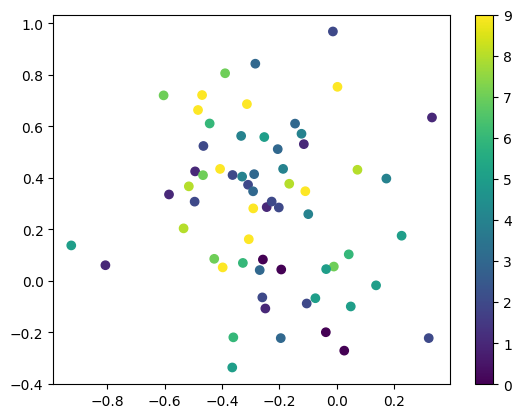

In [19]:
# 결과 시각화 (임의의 데이터 포인트 선택)
with torch.no_grad():
    images, labels = next(iter(data_loader))
    embeddings = model(images)

plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.show()